In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

sns.set(style="whitegrid")

df = pd.read_csv("src/data/df_precios.csv")










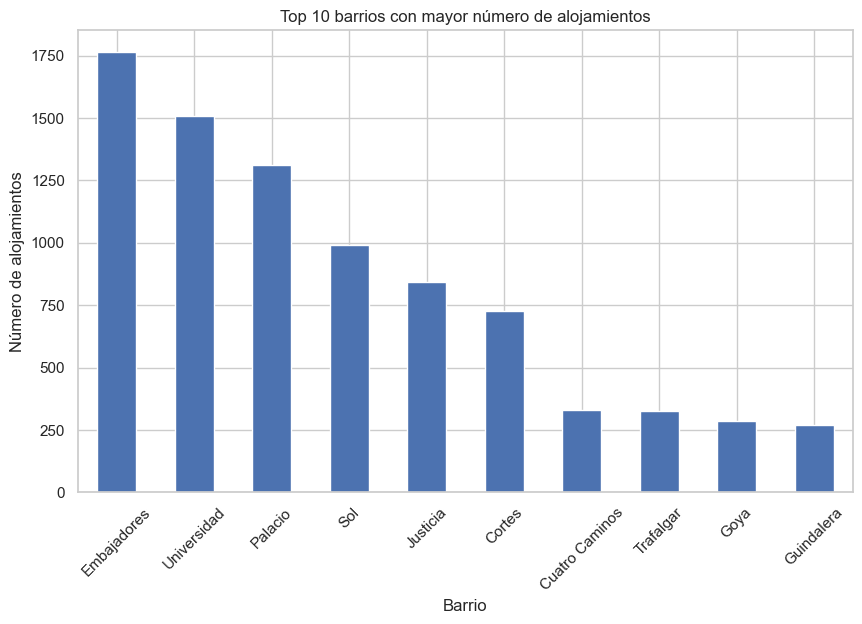

In [5]:
'''1️⃣ ¿Qué barrios concentran más oferta de alojamiento?
Bar chart – Top 10 barrios con más alojamientos'''
top_barrios = (
    df["neighbourhood"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
top_barrios.plot(kind="bar")
plt.title("Top 10 barrios con mayor número de alojamientos")
plt.xlabel("Barrio")
plt.ylabel("Número de alojamientos")
plt.xticks(rotation=45)
plt.show()

In [ ]:

madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=1,
        fill=True
    ).add_to(madrid_map)

madrid_map

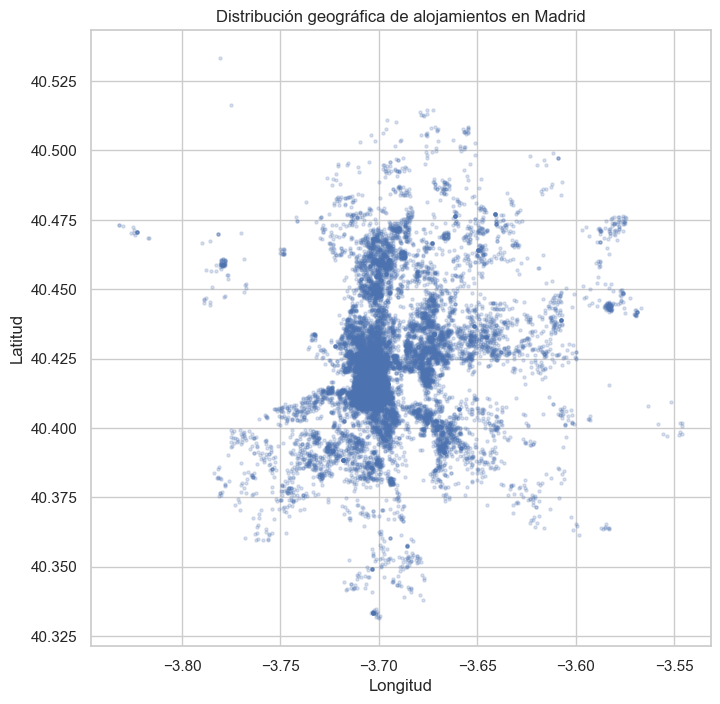

In [6]:
'''Mapa de densidad (scatter)'''
plt.figure(figsize=(8,8))
plt.scatter(
    df["longitude"],
    df["latitude"],
    alpha=0.2,
    s=5
)
plt.title("Distribución geográfica de alojamientos en Madrid")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

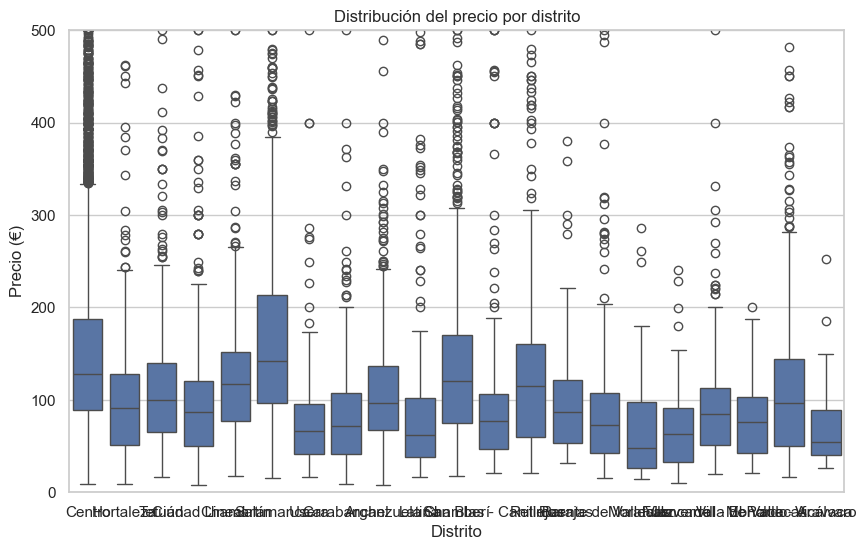

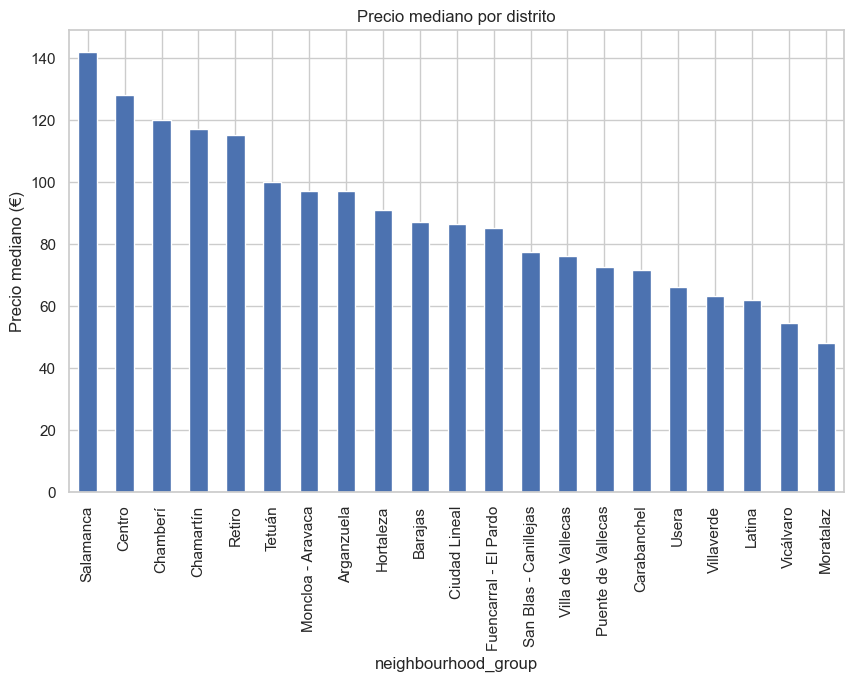

In [8]:
'''2️⃣ ¿Qué zonas presentan los precios más altos?
Boxplot por distrito'''
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="neighbourhood_group",
    y="price"
)
plt.ylim(0, 500)  # recorte para outliers
plt.title("Distribución del precio por distrito")
plt.xlabel("Distrito")
plt.ylabel("Precio (€)")
plt.show()

'''Bar chart – Mediana de precio por distrito'''
precio_mediano = (
    df.groupby("neighbourhood_group")["price"]
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
precio_mediano.plot(kind="bar")
plt.title("Precio mediano por distrito")
plt.ylabel("Precio mediano (€)")
plt.show()


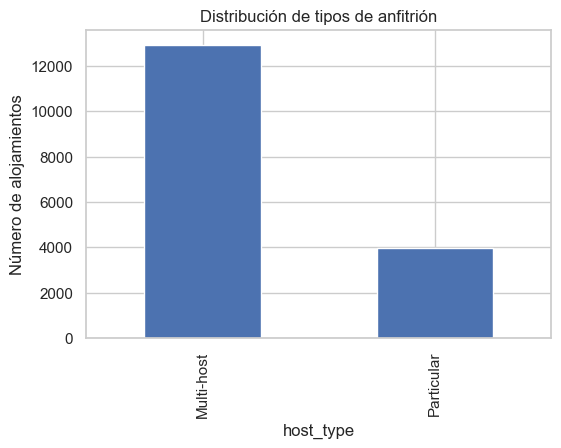

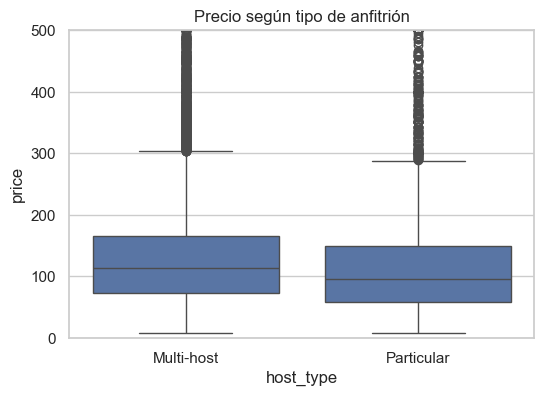

In [9]:
'''3️⃣ ¿Diferencias entre anfitriones particulares y multi-hosts?
Crear variable tipo de anfitrión'''
df["host_type"] = np.where(
    df["calculated_host_listings_count"] > 1,
    "Multi-host",
    "Particular"
)

'''Distribución de anfitriones'''
plt.figure(figsize=(6,4))
df["host_type"].value_counts().plot(kind="bar")
plt.title("Distribución de tipos de anfitrión")
plt.ylabel("Número de alojamientos")
plt.show()

'''Boxplot de precio'''
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="host_type",
    y="price"
)
plt.ylim(0, 500)
plt.title("Precio según tipo de anfitrión")
plt.show()

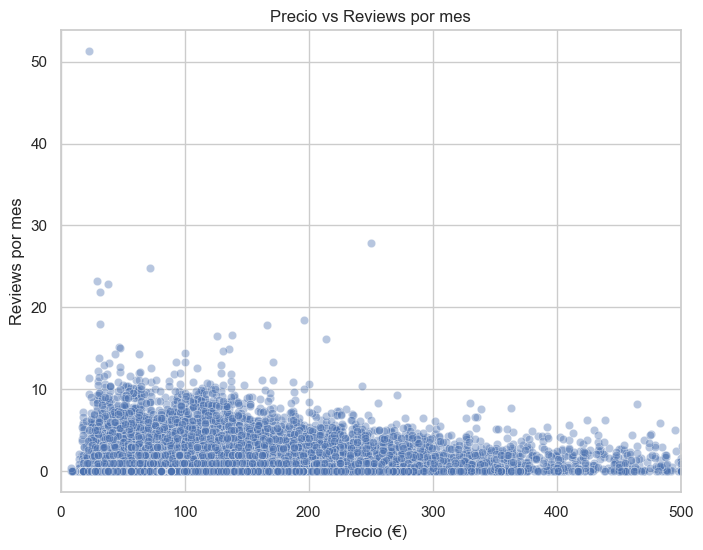

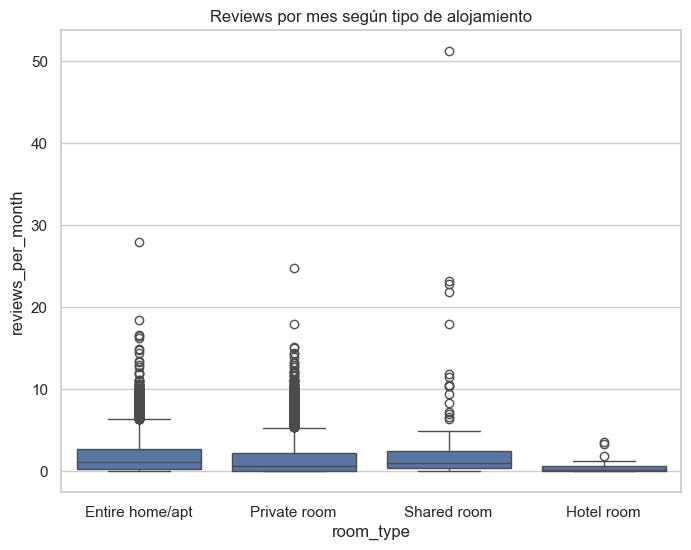

In [12]:
'''4️⃣ ¿Qué características están relacionadas con mejores valoraciones?'''
'''Scatter: precio vs reviews por mes'''
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="price",
    y="reviews_per_month",
    alpha=0.4
)
plt.title("Precio vs Reviews por mes")
plt.xlabel("Precio (€)")
plt.ylabel("Reviews por mes")
plt.xlim(0, 500)
plt.show()

'''Boxplot: tipo de alojamiento vs reviews'''
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="room_type",
    y="reviews_per_month"
)
plt.title("Reviews por mes según tipo de alojamiento")
plt.show()

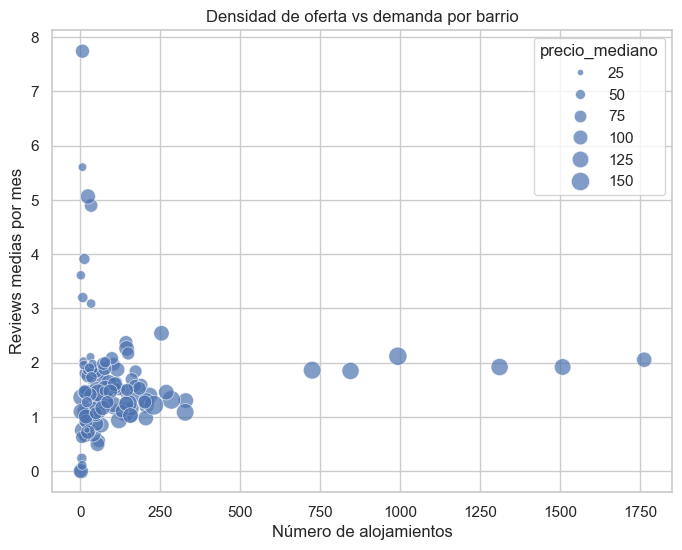

In [13]:
'''5️⃣ ¿Existen zonas desaprovechadas?
Scatter densidad vs demanda'''
zona_analysis = (
    df.groupby("neighbourhood")
    .agg(
        alojamientos=("id", "count"),
        reviews_medias=("reviews_per_month", "mean"),
        precio_mediano=("price", "median")
    )
    .reset_index()
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=zona_analysis,
    x="alojamientos",
    y="reviews_medias",
    size="precio_mediano",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Densidad de oferta vs demanda por barrio")
plt.xlabel("Número de alojamientos")
plt.ylabel("Reviews medias por mes")
plt.show()

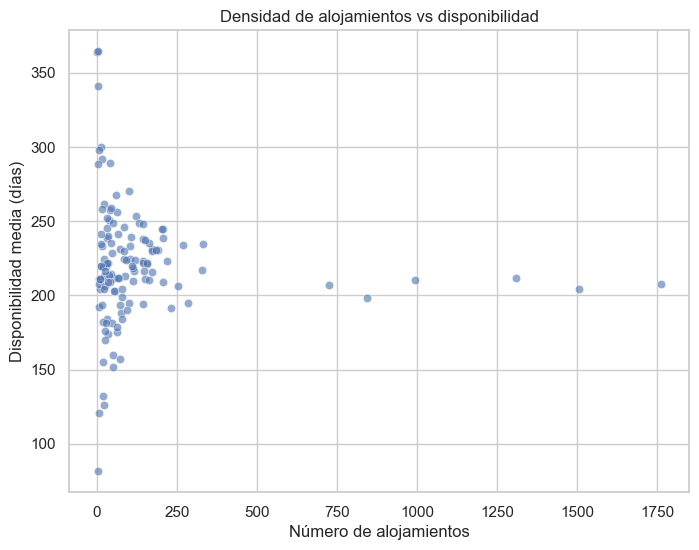

In [14]:
'''6️⃣ ¿Existen zonas sobreexplotadas?'''
zona_over = (
    df.groupby("neighbourhood")
    .agg(
        alojamientos=("id", "count"),
        disponibilidad=("availability_365", "mean")
    )
    .reset_index()
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=zona_over,
    x="alojamientos",
    y="disponibilidad",
    alpha=0.6
)
plt.title("Densidad de alojamientos vs disponibilidad")
plt.xlabel("Número de alojamientos")
plt.ylabel("Disponibilidad media (días)")
plt.show()

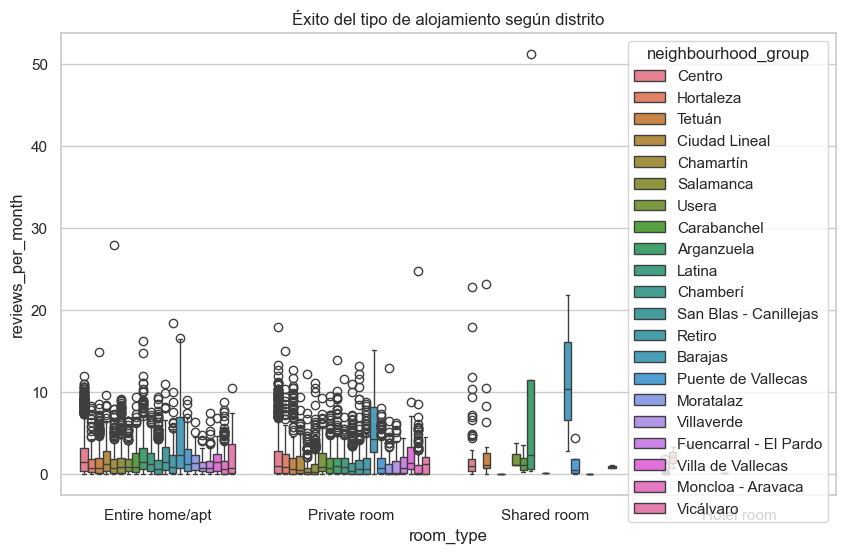

In [15]:
'''7️⃣ ¿Varían las características de éxito según la ubicación?'''
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="room_type",
    y="reviews_per_month",
    hue="neighbourhood_group"
)
plt.title("Éxito del tipo de alojamiento según distrito")
plt.show()


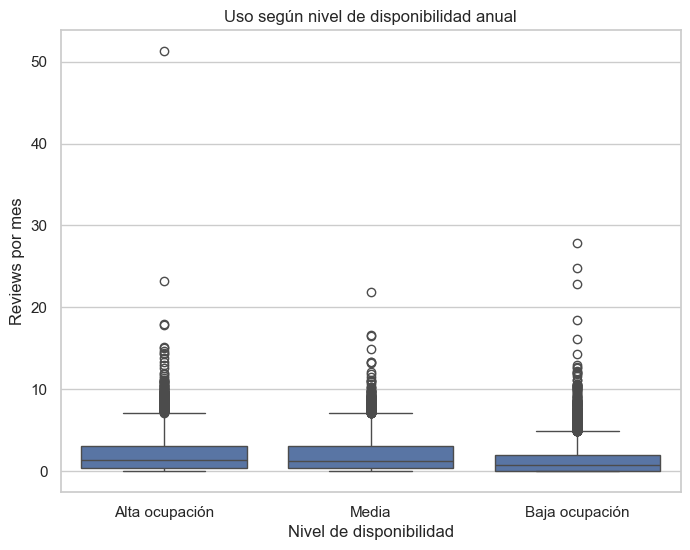

In [17]:
'''8️⃣ ¿Diferencias de uso según época del año? (proxy)
Crear bins de disponibilidad'''
df["availability_group"] = pd.cut(
    df["availability_365"],
    bins=[0, 120, 240, 365],
    labels=["Alta ocupación", "Media", "Baja ocupación"]
)

'''Boxplot'''
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="availability_group",
    y="reviews_per_month"
)
plt.title("Uso según nivel de disponibilidad anual")
plt.xlabel("Nivel de disponibilidad")
plt.ylabel("Reviews por mes")
plt.show()


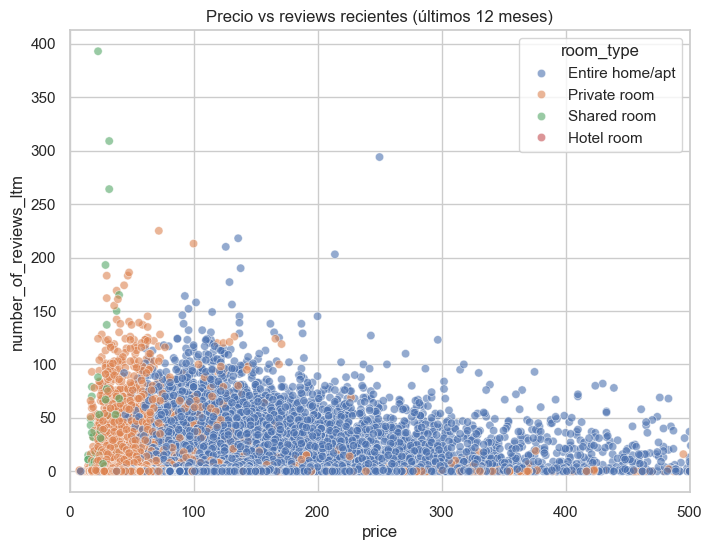

In [18]:
'''9️⃣ Pisos mejor valorados en periodos recientes'''
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="price",
    y="number_of_reviews_ltm",
    hue="room_type",
    alpha=0.6
)
plt.xlim(0, 500)
plt.title("Precio vs reviews recientes (últimos 12 meses)")
plt.show()

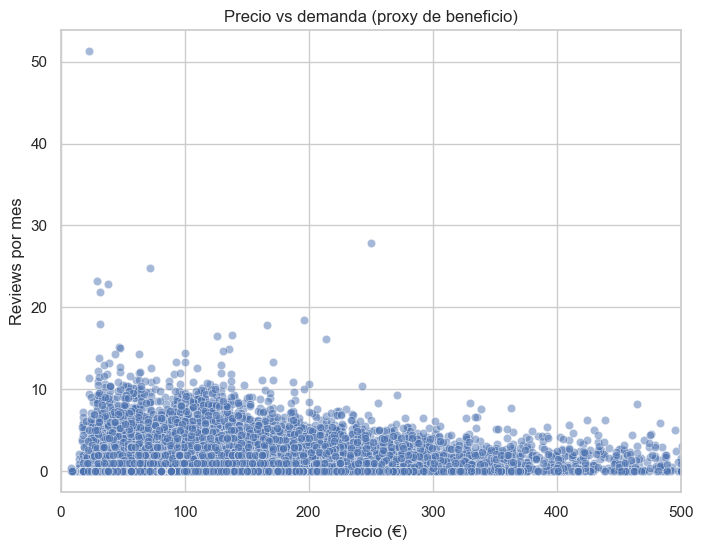

In [19]:
'''🔟 ¿Los pisos más caros son los más rentables?'''
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="price",
    y="reviews_per_month",
    alpha=0.5
)
plt.title("Precio vs demanda (proxy de beneficio)")
plt.xlabel("Precio (€)")
plt.ylabel("Reviews por mes")
plt.xlim(0, 500)
plt.show()

In [ ]:
# Ordenar distritos por precio mediano
order = (
    df.groupby("neighbourhood_group")["price"]
    .median()
    .sort_values(ascending=False)
    .index
)
# Crear boxplot claro
plt.figure(figsize=(12,6))
plt.boxplot(
    [df[df["neighbourhood_group"] == d]["price"] for d in order],
    labels=order,
    showfliers=False
)
plt.ylim(0, 400)
plt.title("Distribución del precio por distrito (ordenado por mediana)")
plt.xlabel("Distrito")
plt.ylabel("Precio (€)")
plt.xticks(rotation=45)
plt.tight_layout()
# Guardar imagen
plt.savefig("precio_por_distrito_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()